In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss

In [2]:
df=pd.read_csv('traindata.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
# Remove rows with at least one null value
df = df.dropna()
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
# Select only the categorical columns
categorical_df = df.select_dtypes(include=['object'])
categorical_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [8]:
# # Extract the column names as a list
# categorical_column_names = categorical_df.columns.tolist()
# categorical_column_names

In [9]:
# Extract the column names as a list
cat_var = list(categorical_df)
cat_var

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [10]:
## Let us split this list into two parts
cat_var1 = ('Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area')
cat_var2 = ('Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area')

In [11]:
import itertools

In [12]:
# Create all possible combinations between the two lists
combinations = list(itertools.product(cat_var1, cat_var2))
combinations

[('Gender', 'Gender'),
 ('Gender', 'Married'),
 ('Gender', 'Dependents'),
 ('Gender', 'Education'),
 ('Gender', 'Self_Employed'),
 ('Gender', 'Property_Area'),
 ('Married', 'Gender'),
 ('Married', 'Married'),
 ('Married', 'Dependents'),
 ('Married', 'Education'),
 ('Married', 'Self_Employed'),
 ('Married', 'Property_Area'),
 ('Dependents', 'Gender'),
 ('Dependents', 'Married'),
 ('Dependents', 'Dependents'),
 ('Dependents', 'Education'),
 ('Dependents', 'Self_Employed'),
 ('Dependents', 'Property_Area'),
 ('Education', 'Gender'),
 ('Education', 'Married'),
 ('Education', 'Dependents'),
 ('Education', 'Education'),
 ('Education', 'Self_Employed'),
 ('Education', 'Property_Area'),
 ('Self_Employed', 'Gender'),
 ('Self_Employed', 'Married'),
 ('Self_Employed', 'Dependents'),
 ('Self_Employed', 'Education'),
 ('Self_Employed', 'Self_Employed'),
 ('Self_Employed', 'Property_Area'),
 ('Property_Area', 'Gender'),
 ('Property_Area', 'Married'),
 ('Property_Area', 'Dependents'),
 ('Property_Are

In [13]:
len(combinations)

36

In [14]:
# Remove duplicate combinations where the order doesn't matter (e.g., 'Gender', 'Married' is the same as 'Married', 'Gender')
unique_combinations = set([tuple(sorted(comb)) for comb in combinations])
unique_combinations

{('Dependents', 'Dependents'),
 ('Dependents', 'Education'),
 ('Dependents', 'Gender'),
 ('Dependents', 'Married'),
 ('Dependents', 'Property_Area'),
 ('Dependents', 'Self_Employed'),
 ('Education', 'Education'),
 ('Education', 'Gender'),
 ('Education', 'Married'),
 ('Education', 'Property_Area'),
 ('Education', 'Self_Employed'),
 ('Gender', 'Gender'),
 ('Gender', 'Married'),
 ('Gender', 'Property_Area'),
 ('Gender', 'Self_Employed'),
 ('Married', 'Married'),
 ('Married', 'Property_Area'),
 ('Married', 'Self_Employed'),
 ('Property_Area', 'Property_Area'),
 ('Property_Area', 'Self_Employed'),
 ('Self_Employed', 'Self_Employed')}

In [15]:
len(unique_combinations)

21

In [16]:
from scipy.stats import chi2_contingency

In [17]:
# Iterate through combinations and perform chi-square test
results = []

for var1 in cat_var1:
    for var2 in cat_var2:
        if var1 != var2:  # Avoid comparing the same variable
            contingency_table = pd.crosstab(df[var1], df[var2])
            chi2, p, _, _ = chi2_contingency(contingency_table)
            results.append([var1, var2, chi2, p])

# Create a DataFrame to store the results
result_df = pd.DataFrame(results, columns=['Variable1', 'Variable2', 'Chi-Square', 'p-value'])
result_df

,Variable1,Variable2,Chi-Square,p-value
0,Gender,Married,56.714593,5.038824e-14
1,Gender,Dependents,23.898135,2.623355e-05
2,Gender,Education,1.322012,2.502313e-01
3,Gender,Self_Employed,0.000000,1.000000e+00
4,Gender,Property_Area,5.658391,5.906034e-02
5,Married,Gender,56.714593,5.038824e-14
6,Married,Dependents,82.888231,7.368576e-18
7,Married,Education,0.000000,1.000000e+00
8,Married,Self_Employed,0.041885,8.378395e-01
9,Married,Property_Area,0.786861,6.747384e-01


In [18]:
# Filter significant associations (e.g., p-value < 0.05)
significant_results = result_df[result_df['p-value'] < 0.05]
significant_results

,Variable1,Variable2,Chi-Square,p-value
0,Gender,Married,56.714593,5.038824e-14
1,Gender,Dependents,23.898135,2.623355e-05
5,Married,Gender,56.714593,5.038824e-14
6,Married,Dependents,82.888231,7.368576e-18
10,Dependents,Gender,23.898135,2.623355e-05
11,Dependents,Married,82.888231,7.368576e-18


In [19]:
crosstab = result_df.pivot(index='Variable1', columns='Variable2', values='p-value')
crosstab

Variable2,Dependents,Education,Gender,Married,Property_Area,Self_Employed
Variable1,,,,,,
Dependents,NaN,0.886722,2.623355e-05,7.368576e-18,0.053520,0.201808
Education,8.867223e-01,NaN,2.502313e-01,1.000000e+00,0.332869,1.000000
Gender,2.623355e-05,0.250231,NaN,5.038824e-14,0.059060,1.000000
Married,7.368576e-18,1.000000,5.038824e-14,NaN,0.674738,0.837840
Property_Area,5.352036e-02,0.332869,5.906034e-02,6.747384e-01,NaN,0.502958
Self_Employed,2.018083e-01,1.000000,1.000000e+00,8.378395e-01,0.502958,NaN


In [20]:
result_df.columns

Index(['Variable1', 'Variable2', 'Chi-Square', 'p-value'], dtype='object')

In [23]:
# If the p-value is small (typically less than a predefined significance level, such as 0.05),
# it suggests that the observed data is unlikely under the null hypothesis.
# In this case, you reject the null hypothesis in favor of the alternative hypothesis,
# indicating evidence of a significant effect, difference, or relationship.

# If the p-value is large, 
# it suggests that the observed data is reasonably likely under the null hypothesis. 
# In this case, you do not have enough evidence to reject the null hypothesis.

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

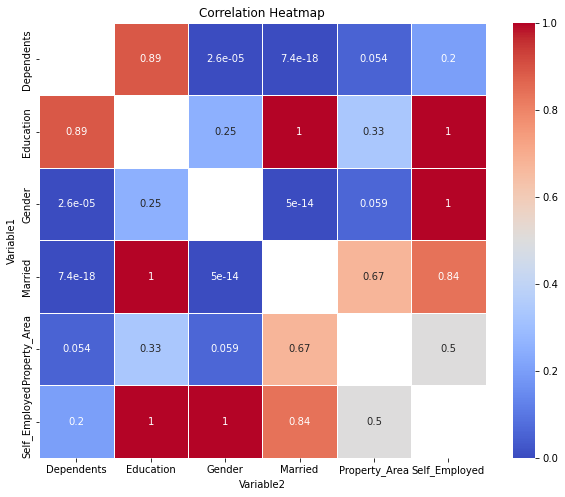

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()